In [2]:
#importing of necessary libraries
import pandas as pd  
import numpy as np  
import seaborn as sns 
import pyreadstat 
import matplotlib.pyplot as plt

In [3]:
# Path to your SPSS file
df_benin = "C:\\Users\\1221\\Desktop\\Kifya\\data\\benin-malanville.csv"
df_sieral = "C:\\Users\\1221\\Desktop\\Kifya\\data\\sierraleone-bumbuna.csv"
df_togo = "C:\\Users\\1221\\Desktop\\Kifya\\data\\togo-dapaong_qc.csv"

# Read the csv file
df_benin = pd.read_csv(df_benin)
df_benin

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [4]:
df_benin['country'] = "benin"
df_benin

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,benin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN,benin
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN,benin
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN,benin
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN,benin


In [5]:
# Read the csv file
df_sieral = pd.read_csv(df_sieral)
df_sieral

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [6]:
df_sieral['country'] = "sieralleone"
df_sieral

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,country
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,sieralleone
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,sieralleone
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,sieralleone
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN,sieralleone
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,sieralleone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN,sieralleone
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN,sieralleone
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,sieralleone
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,sieralleone


In [7]:
# Read the csv file
df_togo = pd.read_csv(df_togo)
df_togo 

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [8]:
df_togo['country'] = "togo"
df_togo

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,country
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN,togo
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN,togo
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN,togo
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN,togo
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN,togo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN,togo
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN,togo
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN,togo
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN,togo


In [9]:
# Concatenating the DataFrames
df = pd.concat([df_benin, df_sieral, df_togo], ignore_index=True)

# Display the merged DataFrame
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,benin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576795,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN,togo
1576796,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN,togo
1576797,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN,togo
1576798,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN,togo


In [10]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'country'],
      dtype='object')

In [11]:
#display a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576800 entries, 0 to 1576799
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1576800 non-null  object 
 1   GHI            1576800 non-null  float64
 2   DNI            1576800 non-null  float64
 3   DHI            1576800 non-null  float64
 4   ModA           1576800 non-null  float64
 5   ModB           1576800 non-null  float64
 6   Tamb           1576800 non-null  float64
 7   RH             1576800 non-null  float64
 8   WS             1576800 non-null  float64
 9   WSgust         1576800 non-null  float64
 10  WSstdev        1576800 non-null  float64
 11  WD             1576800 non-null  float64
 12  WDstdev        1576800 non-null  float64
 13  BP             1576800 non-null  int64  
 14  Cleaning       1576800 non-null  int64  
 15  Precipitation  1576800 non-null  float64
 16  TModA          1576800 non-null  float64
 17  TModB   

In [12]:
#summary of statistics for a DataFrame's numeric columns of selected variables 
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,0.0
mean,2.243573e+02,1.449408e+02,1.151746e+02,2.231257e+02,2.155223e+02,2.741696e+01,6.298333e+01,1.878440e+00,2.576763e+00,4.649840e-01,1.494072e+02,8.771398e+00,9.899963e+02,8.079655e-04,2.697615e-03,3.339823e+01,3.286939e+01,NaN
std,3.181073e+02,2.453781e+02,1.580602e+02,3.154732e+02,3.049439e+02,5.131024e+00,2.854366e+01,1.536357e+00,1.961275e+00,2.904002e-01,1.039399e+02,6.790689e+00,1.046797e+01,2.841326e-02,3.803610e-02,1.290953e+01,1.238889e+01,NaN
min,-1.950000e+01,-7.800000e+00,-1.790000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00,NaN
25%,-2.200000e+00,-2.000000e-01,-1.400000e+00,0.000000e+00,0.000000e+00,2.370000e+01,3.860000e+01,6.000000e-01,1.100000e+00,4.000000e-01,5.330000e+01,2.900000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.370000e+01,NaN
50%,1.200000e+00,0.000000e+00,1.400000e+00,4.100000e+00,4.000000e+00,2.680000e+01,6.900000e+01,1.800000e+00,2.400000e+00,5.000000e-01,1.803000e+02,9.000000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.830000e+01,2.800000e+01,NaN
75%,4.244000e+02,2.270000e+02,2.190000e+02,4.111000e+02,3.973000e+02,3.100000e+01,8.860000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.342000e+02,1.290000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.260000e+01,4.190000e+01,NaN
max,1.499000e+03,1.004500e+03,8.920000e+02,1.507000e+03,1.473000e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.500000e+00,8.100000e+01,9.460000e+01,NaN


In [13]:
# Count the number of null values per column
null_counts = df.isnull().sum()
null_counts

Timestamp              0
GHI                    0
DNI                    0
DHI                    0
ModA                   0
ModB                   0
Tamb                   0
RH                     0
WS                     0
WSgust                 0
WSstdev                0
WD                     0
WDstdev                0
BP                     0
Cleaning               0
Precipitation          0
TModA                  0
TModB                  0
Comments         1576800
country                0
dtype: int64

In [14]:
## remove columns from the DataFrame where every entry in the column is NaN.
df = df.dropna(axis=1, how='all')

# Display the cleaned DataFrame
print("\nDataFrame after dropping columns with all NaN values:")
df


DataFrame after dropping columns with all NaN values:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,benin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576795,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,togo
1576796,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,togo
1576797,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,togo
1576798,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,togo


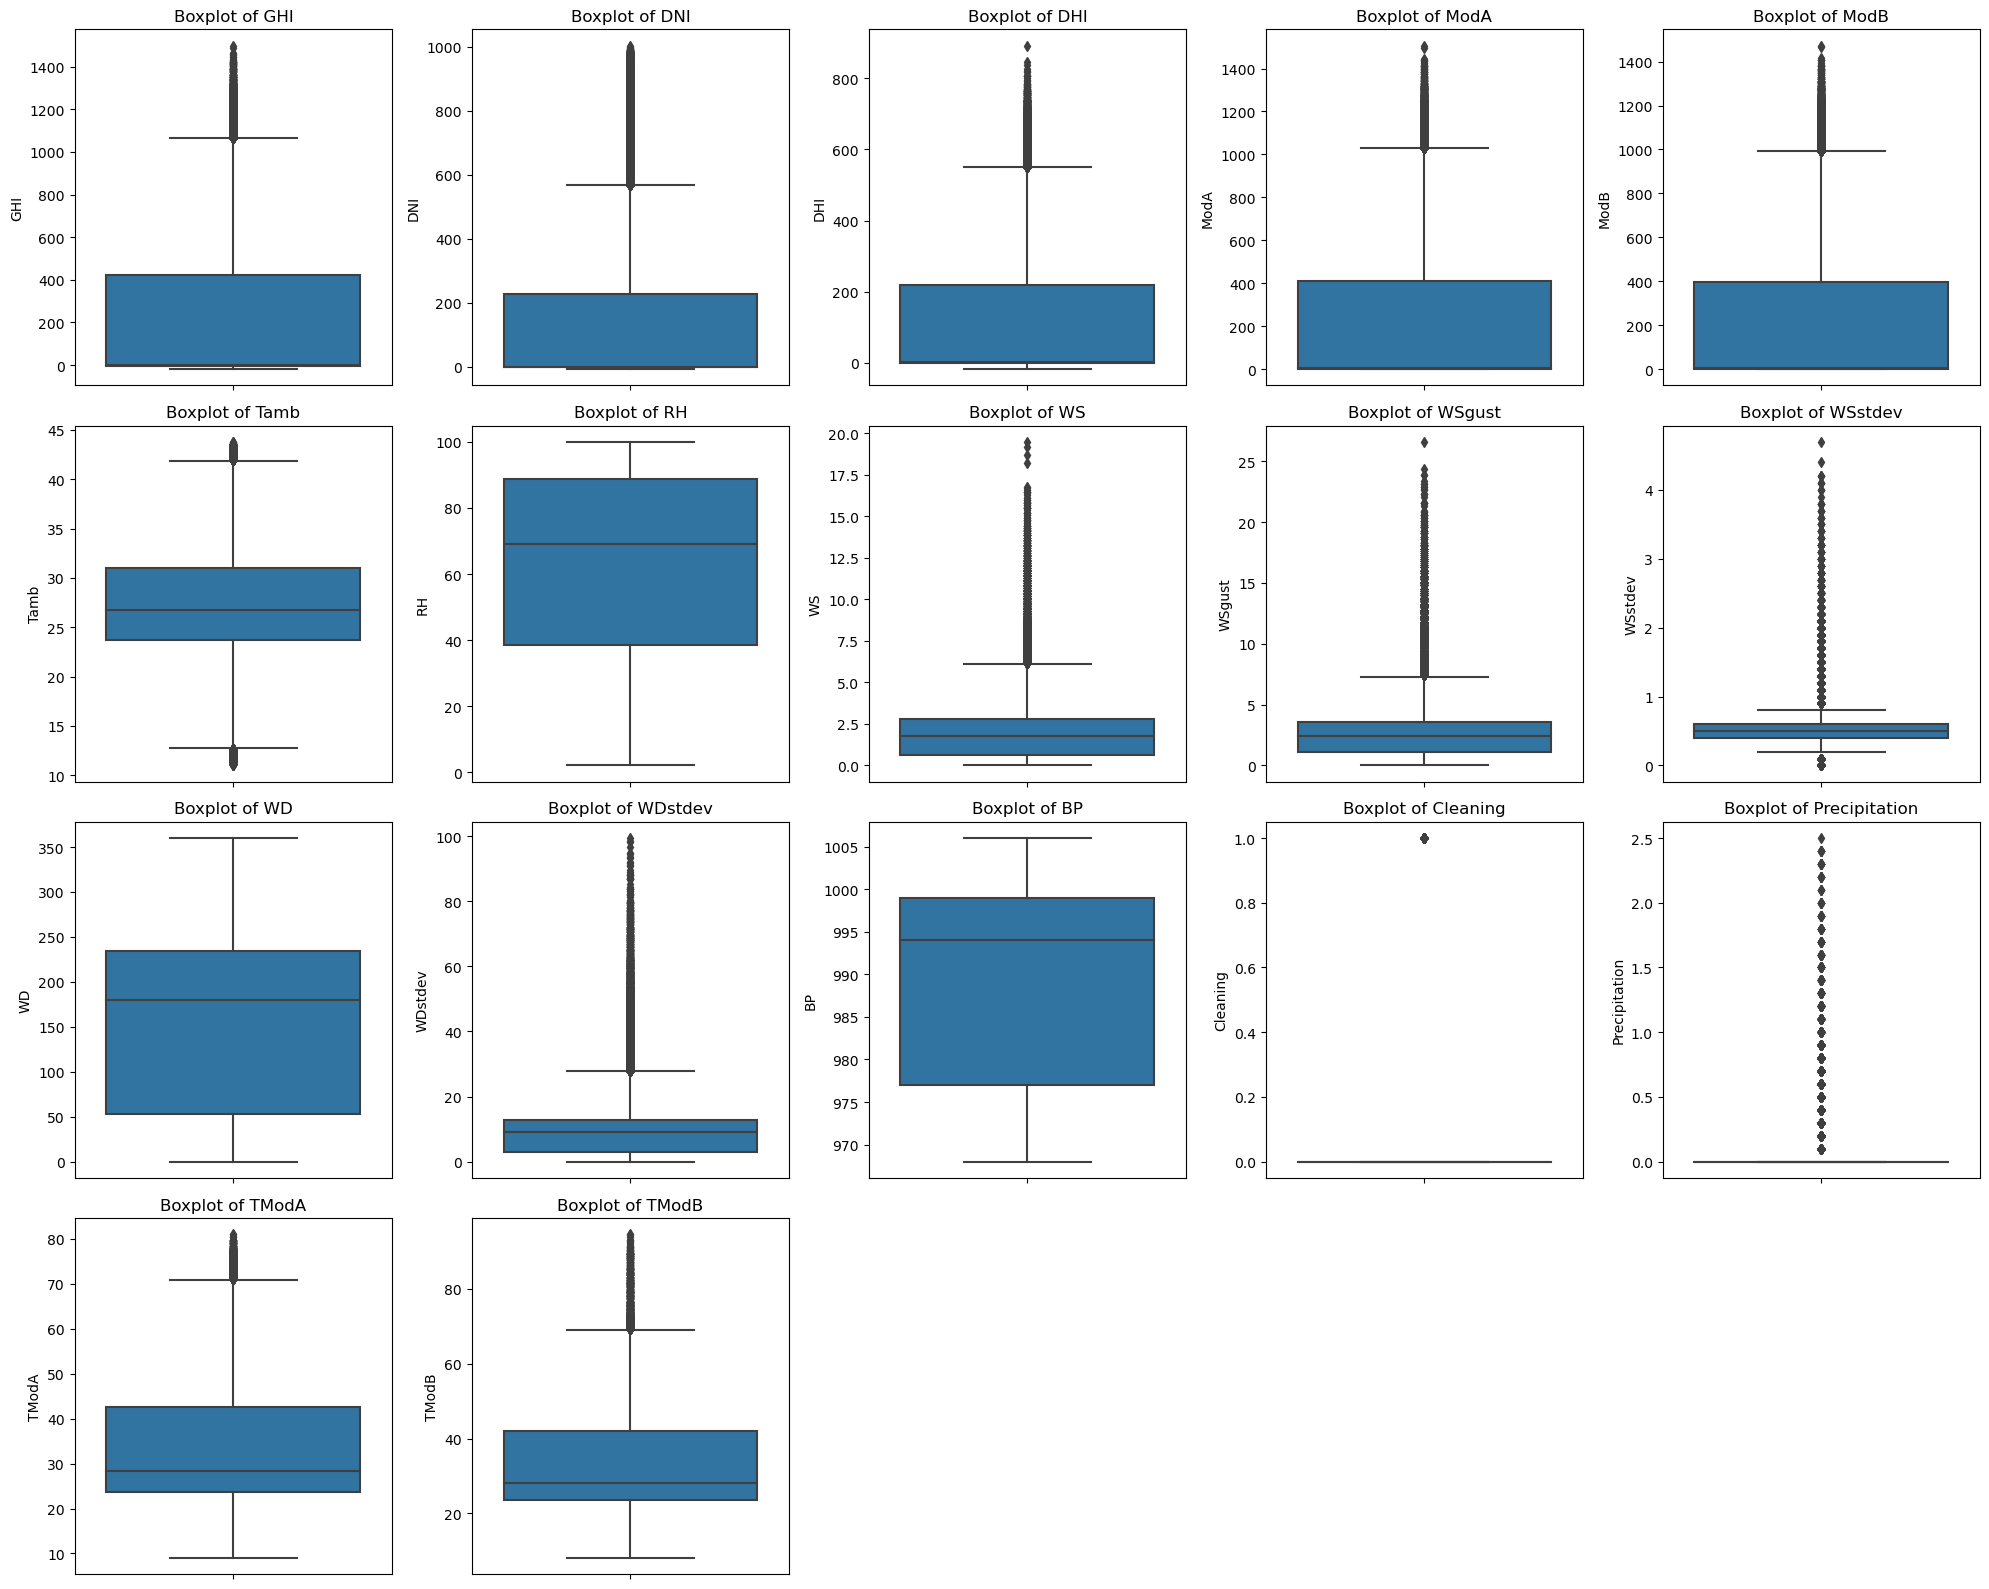

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, col in enumerate(numeric_df.columns):
    sns.boxplot(y=numeric_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

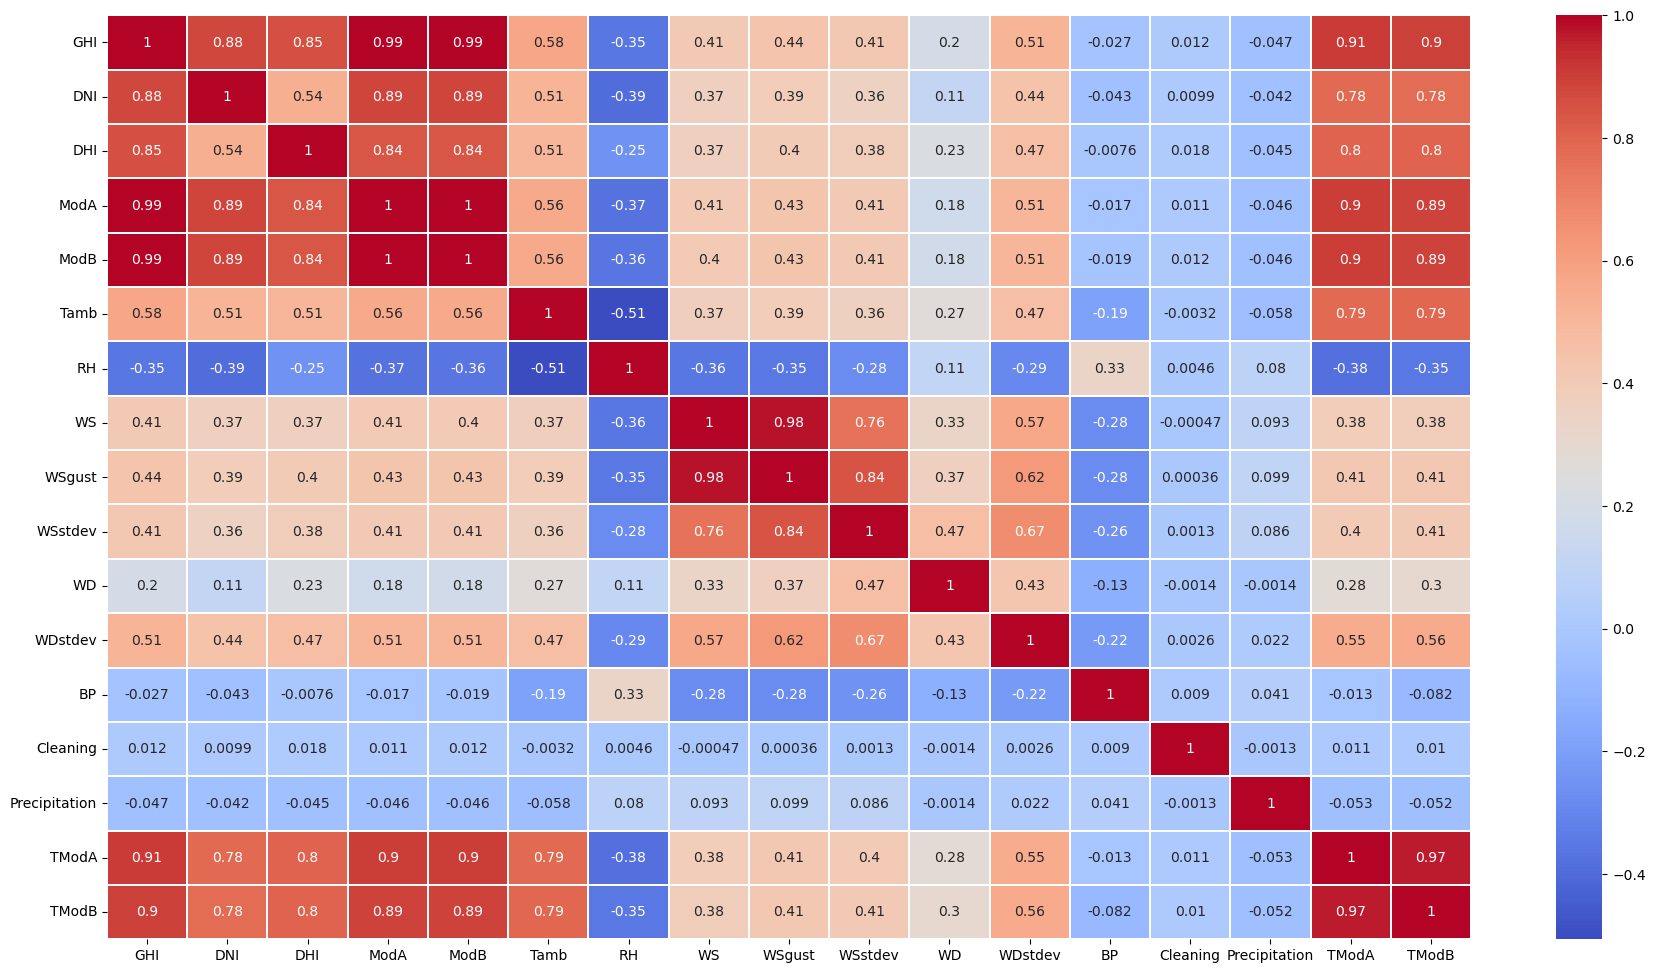

In [16]:
## displaying a correlation map for visualization of Correlation between variables to show their importance
# Select only numeric columns
df_num = df.select_dtypes(include=[np.number])

plt.figure(figsize = (22,12))
sns.heatmap(df_num.corr(), linewidths = 0.2, annot=True, cmap = "coolwarm") 

In [17]:
## saving the dataframe in csv format
df = df.to_csv("C:\\Users\\1221\\Desktop\\Kifya\\data\\output.csv", index=False)

In [18]:
## reading the csv file
df = pd.read_csv("C:\\Users\\1221\\Desktop\\Kifya\\data\\output.csv")
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,benin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576795,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,togo
1576796,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,togo
1576797,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,togo
1576798,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,togo


In [19]:
df_GHI = df.drop(columns = ['DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'country'], axis = 1)
df_GHI

,Timestamp,GHI
0,2021-08-09 00:01,-1.2
1,2021-08-09 00:02,-1.1
2,2021-08-09 00:03,-1.1
3,2021-08-09 00:04,-1.1
4,2021-08-09 00:05,-1.0
...,...,...
1576795,2022-10-24 23:56,-0.8
1576796,2022-10-24 23:57,-0.9
1576797,2022-10-24 23:58,-1.0
1576798,2022-10-24 23:59,-1.1


In [20]:
df_GHI = df_GHI.set_index("Timestamp")

In [21]:
df_GHI.index = pd.to_datetime(df_GHI.index)
df_GHI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576800 entries, 2021-08-09 00:01:00 to 2022-10-25 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   GHI     1576800 non-null  float64
dtypes: float64(1)
memory usage: 24.1 MB


In [22]:
df_GHI

,GHI
Timestamp,
2021-08-09 00:01:00,-1.2
2021-08-09 00:02:00,-1.1
2021-08-09 00:03:00,-1.1
2021-08-09 00:04:00,-1.1
2021-08-09 00:05:00,-1.0
...,...
2022-10-24 23:56:00,-0.8
2022-10-24 23:57:00,-0.9
2022-10-24 23:58:00,-1.0


In [23]:
df_GHI.index

DatetimeIndex(['2021-08-09 00:01:00', '2021-08-09 00:02:00',
               '2021-08-09 00:03:00', '2021-08-09 00:04:00',
               '2021-08-09 00:05:00', '2021-08-09 00:06:00',
               '2021-08-09 00:07:00', '2021-08-09 00:08:00',
               '2021-08-09 00:09:00', '2021-08-09 00:10:00',
               ...
               '2022-10-24 23:51:00', '2022-10-24 23:52:00',
               '2022-10-24 23:53:00', '2022-10-24 23:54:00',
               '2022-10-24 23:55:00', '2022-10-24 23:56:00',
               '2022-10-24 23:57:00', '2022-10-24 23:58:00',
               '2022-10-24 23:59:00', '2022-10-25 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=1576800, freq=None)

<Axes: xlabel='Timestamp'>

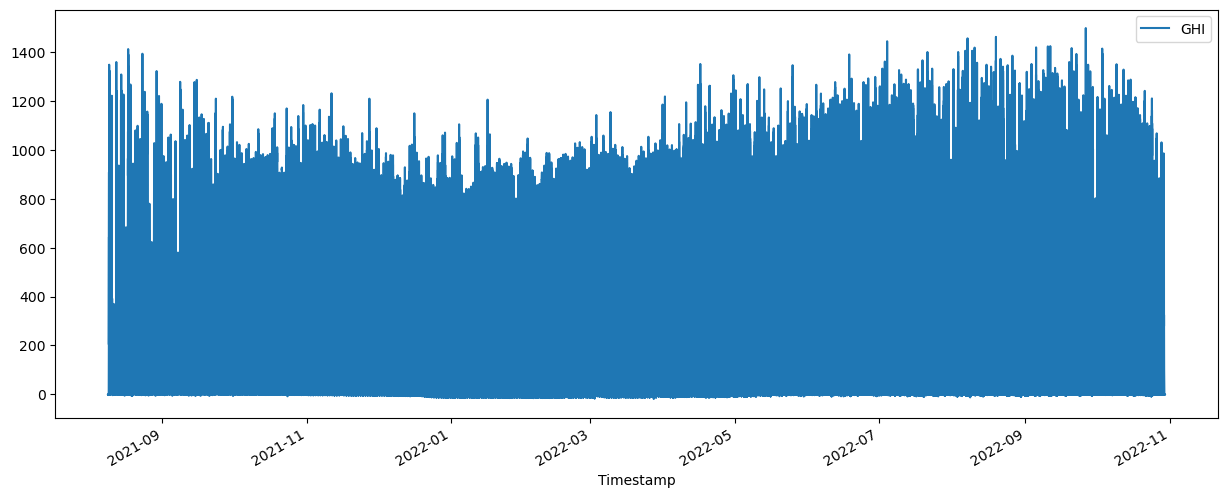

In [24]:
df_GHI.plot(figsize = (15,6), style = "-",)

<Axes: xlabel='Timestamp'>

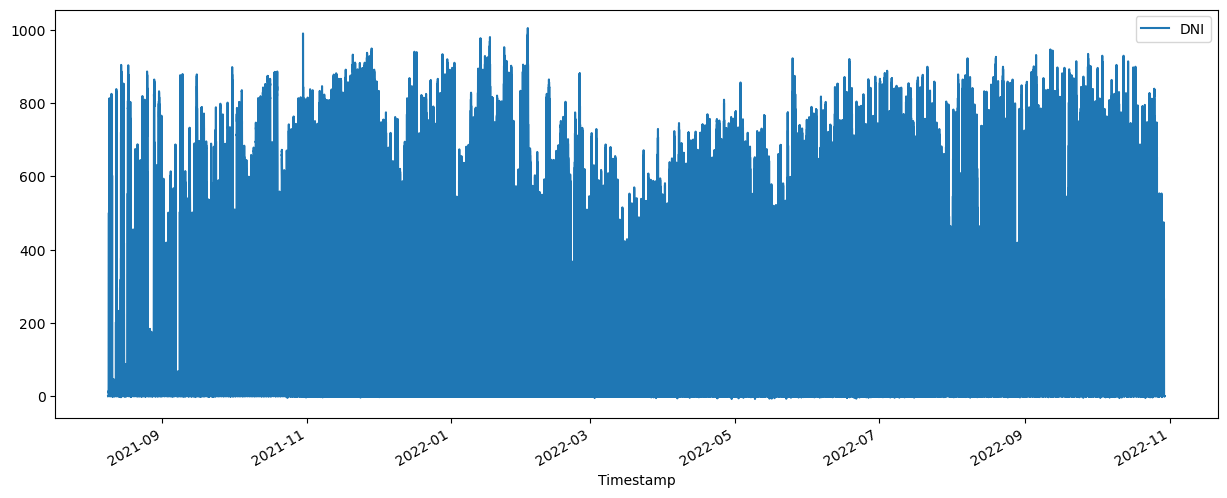

In [25]:
df_DNI = df.drop(columns = ['GHI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'country'], axis = 1)
df_DNI = df_DNI.set_index("Timestamp")
df_DNI.index = pd.to_datetime(df_DNI.index)
df_DNI.plot(figsize = (15,6), style = "-",)

<Axes: xlabel='Timestamp'>

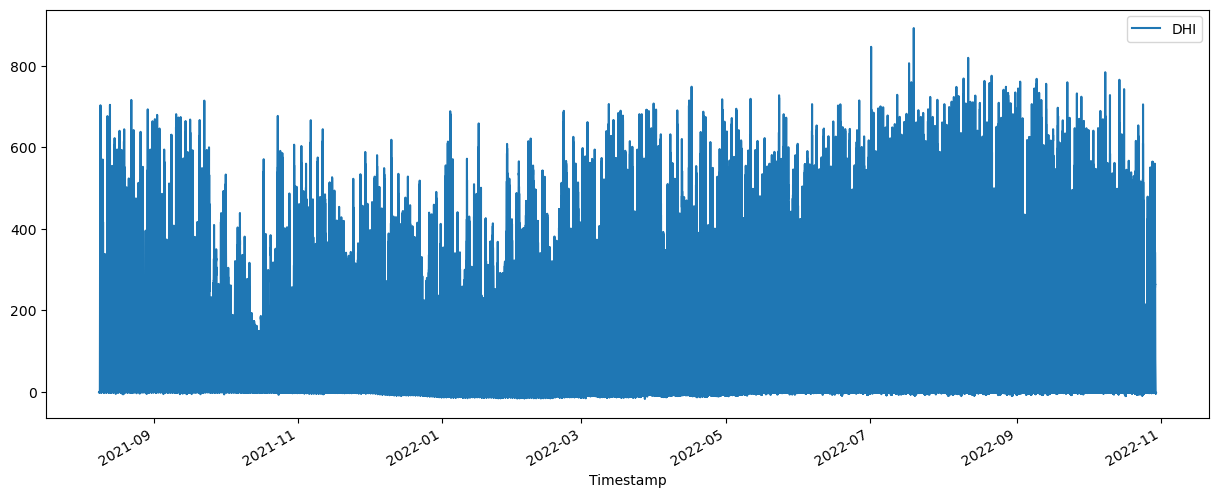

In [26]:
df_DHI = df.drop(columns = ['DNI','GHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'country'], axis = 1)
df_DHI = df_DHI.set_index("Timestamp")
df_DHI.index = pd.to_datetime(df_DHI.index)
df_DHI.plot(figsize = (15,6), style = "-",)

<Axes: xlabel='Timestamp'>

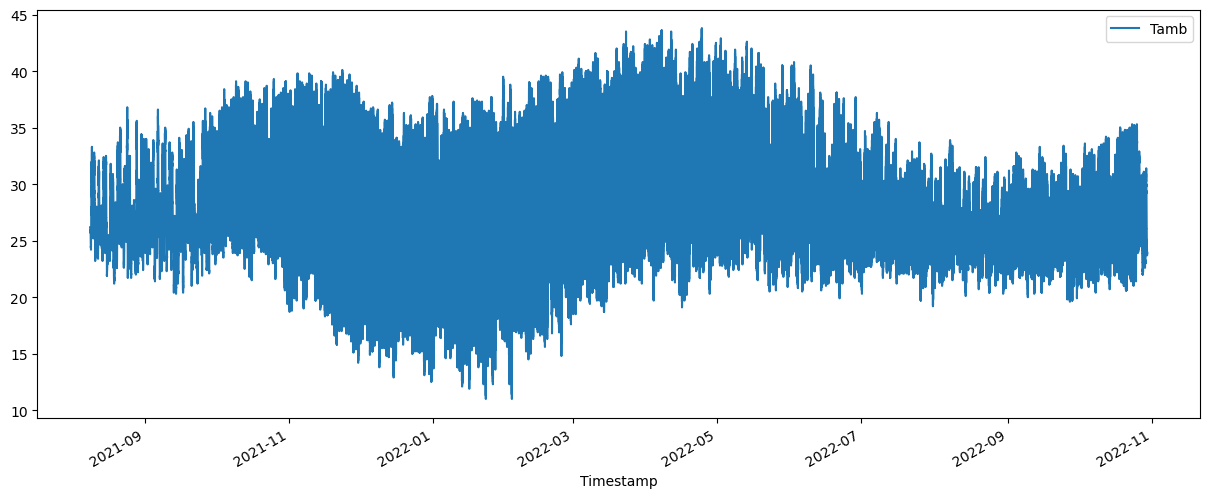

In [27]:
df_Tamb = df.drop(columns = ['DNI','GHI', 'ModA', 'ModB','DHI', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'country'], axis = 1)
df_Tamb = df_Tamb.set_index("Timestamp")
df_Tamb.index = pd.to_datetime(df_Tamb.index)
df_Tamb.plot(figsize = (15,6), style = "-",)

In [28]:
from sklearn.linear_model import LinearRegression

#Setting the value for X and Y
x = df[['ModA', 'ModB']]
y = df['Cleaning']

#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x, y)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  0.0005873074772115453
Coefficients:


[('ModA', -4.997115920772081e-05), ('ModB', 5.275791161845909e-05)]

In [29]:
#relative humidity (RH) might influence temperature readings
x = df[["TModA", "TModB"]]
y = df['RH']

#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x, y)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  89.80429519048967
Coefficients:


[('TModA', -1.4410152003541508), ('TModB', 0.6482138728595588)]

In [30]:
#relative humidity (RH) influence on solar radiation
x = df[["GHI", "DNI", "DHI"]]
y = df['RH']

#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x, y)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  70.84638989134832
Coefficients:


[('GHI', 0.04905816755373248),
 ('DNI', -0.07966133840108881),
 ('DHI', -0.06358557422777422)]

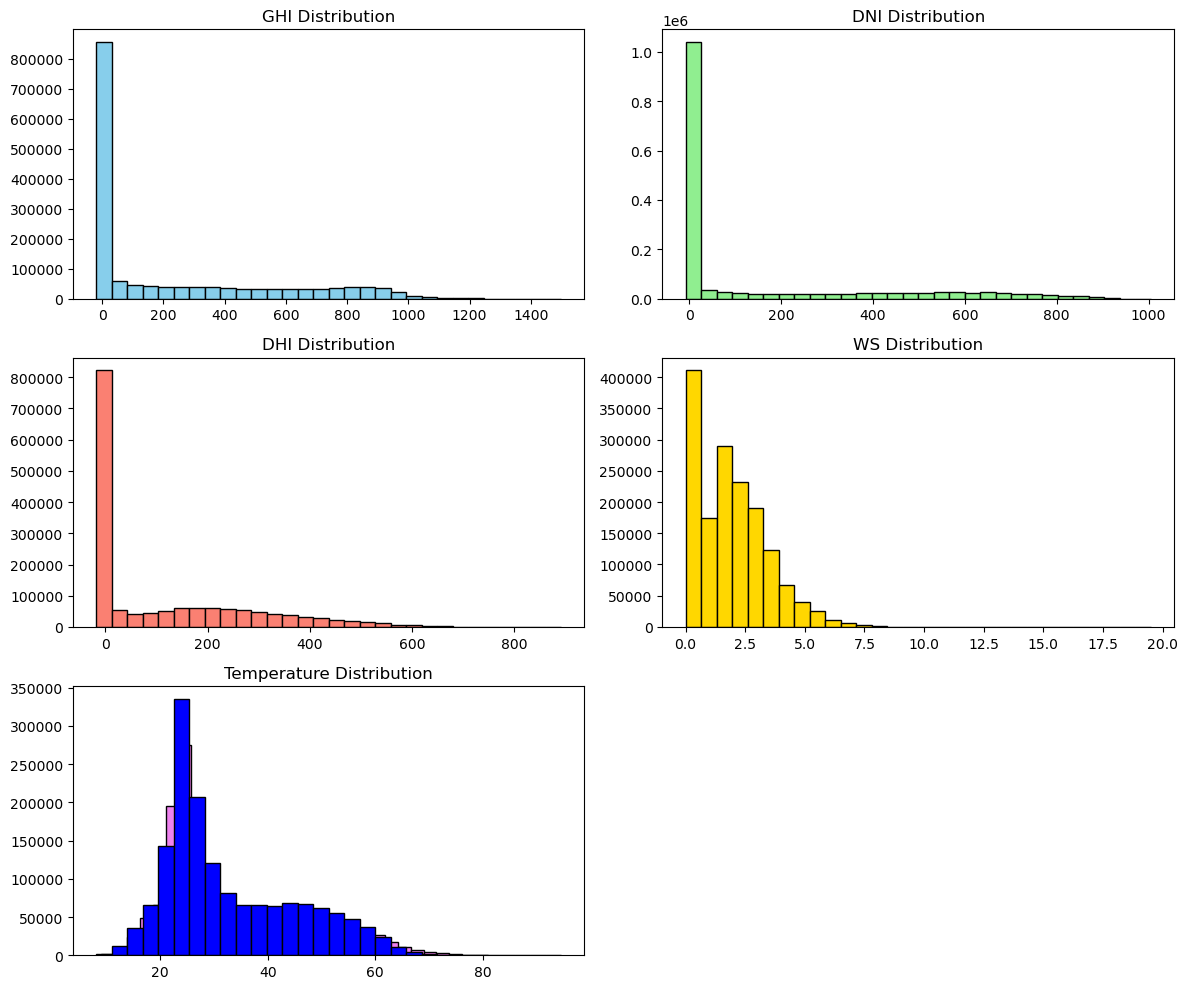

In [31]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Plot histograms
axs[0, 0].hist(df['GHI'], bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('GHI Distribution')

axs[0, 1].hist(df['DNI'], bins=30, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('DNI Distribution')

axs[1, 0].hist(df['DHI'], bins=30, color='salmon', edgecolor='black')
axs[1, 0].set_title('DHI Distribution')

axs[1, 1].hist(df['WS'], bins=30, color='gold', edgecolor='black')
axs[1, 1].set_title('WS Distribution')

axs[2, 0].hist(df['TModA'], bins=30, color='violet', edgecolor='black')
axs[2, 0].set_title('Temperature Distribution')

axs[2, 0].hist(df['TModB'], bins=30, color='blue', edgecolor='black')
axs[2, 0].set_title('Temperature Distribution')


# Remove the empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
# Check for negative values and impute with mean
for column in ['GHI', 'DNI', 'DHI']:
    negative_values = df[column] < 0
    if negative_values.any():
        mean_value = df[column][~negative_values].mean()
        df.loc[negative_values, column] = mean_value

# Display the DataFrame to verify the changes
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,country
0,2021-08-09 00:01,445.817414,221.133295,174.309984,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,benin
1,2021-08-09 00:02,445.817414,221.133295,174.309984,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,benin
2,2021-08-09 00:03,445.817414,221.133295,174.309984,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,benin
3,2021-08-09 00:04,445.817414,221.133295,174.309984,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,benin
4,2021-08-09 00:05,445.817414,221.133295,174.309984,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,benin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576795,2022-10-24 23:56,445.817414,0.000000,0.000000,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,togo
1576796,2022-10-24 23:57,445.817414,0.000000,0.000000,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,togo
1576797,2022-10-24 23:58,445.817414,0.000000,0.000000,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,togo
1576798,2022-10-24 23:59,445.817414,0.000000,0.000000,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,togo


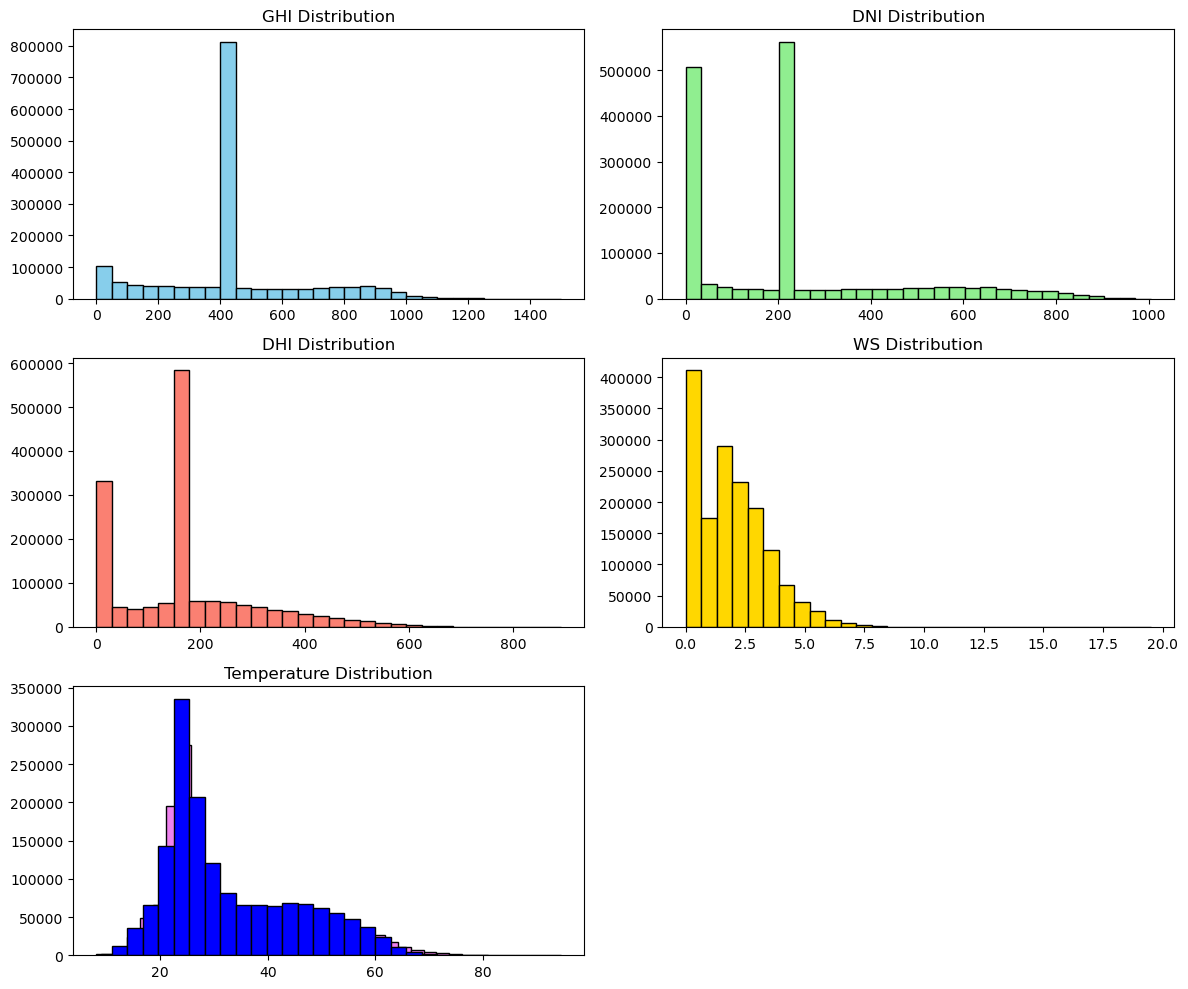

In [33]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Plot histograms
axs[0, 0].hist(df['GHI'], bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('GHI Distribution')

axs[0, 1].hist(df['DNI'], bins=30, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('DNI Distribution')

axs[1, 0].hist(df['DHI'], bins=30, color='salmon', edgecolor='black')
axs[1, 0].set_title('DHI Distribution')

axs[1, 1].hist(df['WS'], bins=30, color='gold', edgecolor='black')
axs[1, 1].set_title('WS Distribution')

axs[2, 0].hist(df['TModA'], bins=30, color='violet', edgecolor='black')
axs[2, 0].set_title('Temperature Distribution')

axs[2, 0].hist(df['TModB'], bins=30, color='blue', edgecolor='black')
axs[2, 0].set_title('Temperature Distribution')


# Remove the empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

In [34]:
from scipy.stats import zscore

numeric_df = df.select_dtypes(include=[np.number])

# Calculate Z-scores
df_zscores = numeric_df.apply(zscore)

# Flag data points with Z-scores greater than 3 or less than -3
threshold = 3
outliers = (df_zscores > threshold) | (df_zscores < -threshold)

# Display the outliers
print("Outliers flagged by Z-scores:")
print(outliers)

# Optionally,  display the actual outlier values
outlier_values = df[outliers]
print("\nOutlier values:")
outlier_values.sum()

Outliers flagged by Z-scores:
           GHI    DNI    DHI   ModA   ModB   Tamb     RH     WS  WSgust  \
0        False  False  False  False  False  False  False  False   False   
1        False  False  False  False  False  False  False  False   False   
2        False  False  False  False  False  False  False  False   False   
3        False  False  False  False  False  False  False  False   False   
4        False  False  False  False  False  False  False  False   False   
...        ...    ...    ...    ...    ...    ...    ...    ...     ...   
1576795  False  False  False  False  False  False  False  False   False   
1576796  False  False  False  False  False  False  False  False   False   
1576797  False  False  False  False  False  False  False  False   False   
1576798  False  False  False  False  False  False  False  False   False   
1576799  False  False  False  False  False  False  False  False   False   

         WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  TMo

Timestamp                0
GHI              4364186.0
DNI              3094867.8
DHI              8132937.1
ModA             1204481.6
ModB             1573748.6
Tamb                9489.0
RH                     0.0
WS                 85376.4
WSgust            105031.0
WSstdev            17641.0
WD                     0.0
WDstdev           451342.2
BP                     0.0
Cleaning            1274.0
Precipitation       2986.2
TModA             237819.8
TModB              86434.1
country                  0
dtype: object

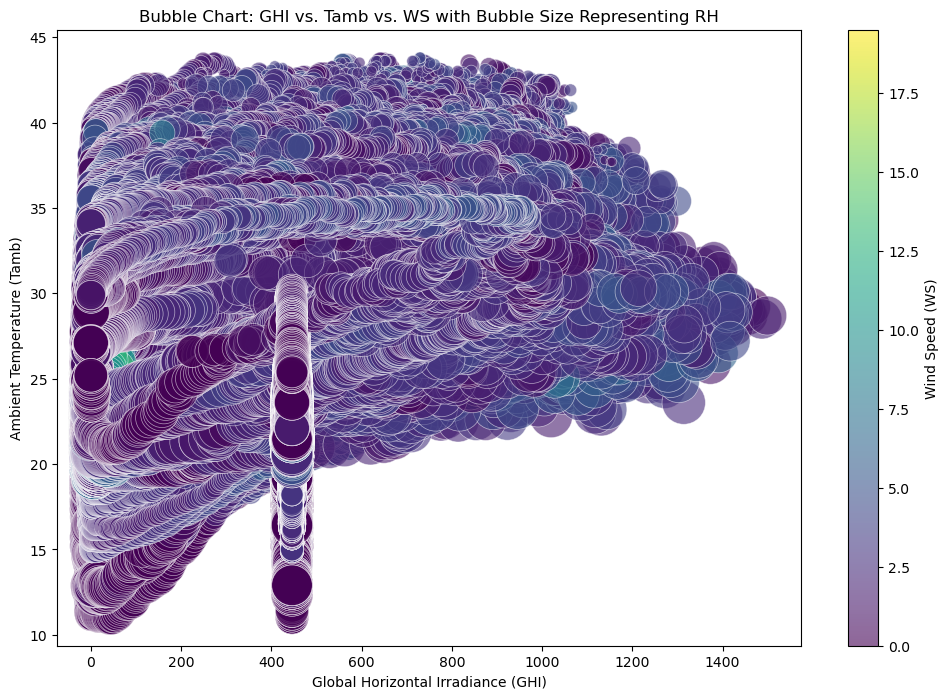

In [35]:
# Create bubble chart
plt.figure(figsize=(12, 8))

# Bubble size can be either RH or BP, here we use RH
bubble_size = df['RH'] * 10  # Scale the bubble size for better visualization

plt.scatter(df['GHI'], df['Tamb'], s=bubble_size, c=df['WS'], cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.colorbar(label='Wind Speed (WS)')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs. Tamb vs. WS with Bubble Size Representing RH')

plt.show()

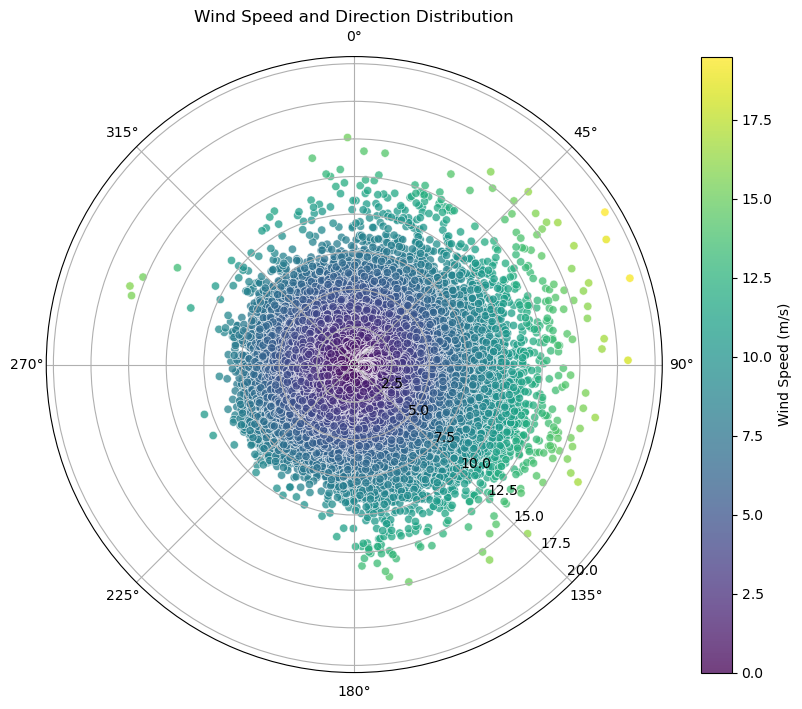

In [36]:
# Convert wind direction to radians for polar plot
wind_direction_rad = np.deg2rad(df['WD'])

# Create polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)
sc = ax.scatter(wind_direction_rad, df['WS'], c=df["WS"], cmap='viridis', alpha=0.75, edgecolors='w', linewidth=0.5)

# Add color bar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical')
cbar.set_label('Wind Speed (m/s)')

# Set plot title and labels
ax.set_title('Wind Speed and Direction Distribution')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(135)

plt.show()